<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [ ]:
!pip install seaborn nbformat plotly

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

In [4]:
import pandas as pd 

df = pd.read_csv(URL)
df.to_csv('dataset.csv', index=False)

---


# Test Environment


In [5]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [11]:
#columns with missing values 
missing_values = df.isnull().sum()
missing_values

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [10]:
import numpy as np
df.replace(np.nan, df['tax'].mean(), inplace=True)

In [14]:
#remove duplicates 
df.drop_duplicates(inplace=True)


In [20]:
df.select_dtypes(include=['number']).corr()['price'].sort_values(axis=0, ascending=False)


price         1.000000
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64

In [23]:
df.fuelType.value_counts()

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

<Axes: xlabel='transmission', ylabel='price'>

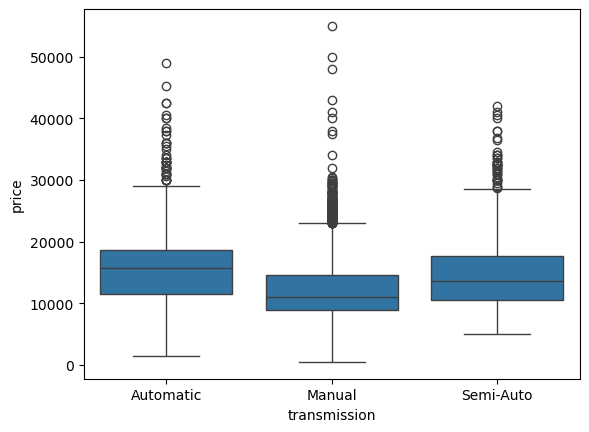

In [24]:
#boxplot in transmission column 
import seaborn as sns
sns.boxplot(x='transmission', y='price', data=df)

In [28]:
#linear regression model on mpg x price
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


x = df[['mpg']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
yhat = model.predict(x_test)

r2_score(y_test, yhat)
mean_squared_error(y_test, yhat)

19772106.439501107

In [29]:
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, Y_train)


yhat = model.predict(X_test)

print(r2_score(Y_test, yhat))
print(mean_squared_error(Y_test, yhat))

0.7165878954927232
6195666.791460011


In [33]:
#pipeline with stdscaler, sencond degree polynomial features and linear regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

#poly transform 
x_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
x_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)

pipe.fit(x_train_poly, Y_train)

yhat = pipe.predict(x_test_poly)

print(r2_score(Y_test, yhat))
print(mean_squared_error(Y_test, yhat))

0.8067526210421982
4224577.388559629


In [ ]:
#import ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.1))
])



grid_search = GridSearchCV(pipe, param_grid=grid, cv=5)
grid_search.fit(x_train_poly, Y_train)

yhat = grid_search.best_estimator_.predict(X_test)

print(r2_score(Y_test, yhat))
print(mean_squared_error(Y_test, yhat))

c:\Users\KKKKKKKKKKKKKKKKKKKK\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



ValueError: X has 5 features, but StandardScaler is expecting 21 features as input.

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
